**LOUA PIVOT REMY**

**TD - TP 6 Réseau de neurones convolutifs pour la classification binaire d’images**

Ce TP s’intéresse à la classification d’images cellulaires en deux classes : image d’une cellule infectée   
ou image d’une cellule non infectée. Vous serez amené à construire votre premier réseau de neurones   
convolutifs. Un compte rendu est demandé en fin de séance

## Augmentation de la taille du jeu de données d’entrainement   
L’apprentissage profond, pour atteindre de bonnes performances, requiert, un jeu données de taille 
importante. Lorsque la taille n’est pas grande, le jeu de données est augmenté de manière artificielle en 
appliquant différentes transformations des images disponibles dans le jeu de données. 


### Importez tout d’abord les librairies utiles, à savoir : 


In [1]:
from keras.preprocessing.image import ImageDataGenerator 
from skimage import io 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### On souhaite appliquer un ensemble de transformations dictées par les lignes de code ci-dessous : 


In [2]:
datagen = ImageDataGenerator(
        rotation_range=45,     # Rotation aléatoire entre 0 et 45
        width_shift_range=0.2,   # decalage de l'image de l'axe X de 20%
        height_shift_range=0.2, # decalage de l'image de l'axe Y de 20%
        shear_range=0.2,  # Intensité de cisaillement (angle de cisaillement dans le sens antihoraire en degrés)
        zoom_range=0.2, # valeur ou Plage de zoom aléatoire
        horizontal_flip=True,   # Inversez aléatoirement les entrées horizontalement.
        fill_mode='constant', cval=125) # essaie le plus proche, constant
        # cval Valeur utilisée pour les points en dehors des limites quand le fill_mode='constant'

- **constant** : Qui remplira la zone vide en noir, nous pouvons changer la couleur en donnant une valeur pour `cval`  

`rotation_range=45` signifie que je veux faire pivoter mon image au hasard entre 0 et 45 degrés.  
`width_shift_range=0.2` et `height_shift_range=0.2` un moyen décale l'image le long de l'axe X de 20 % et de l'axe Y de 20 %.   
`shear_range=0.2` signifie cisailler l'image de 20 %. zoom_rangesignifie zoom avant et zoom arrière de 20 %.  
Pour la réflexion miroir  L'argument le plus important de ImageDataGeneratorest `fill_mode` Lorsque votre image se décale de 20 %, il reste de l'espace.


### Créez un répertoire pour sauvegarder les images transformées : 

In [3]:

x =io.imread('monalisa.jpg') 

In [4]:
x = x.reshape((1, ) + x.shape) 

In [5]:
x.shape

(1, 256, 256, 3)

Expliquez la dernière ligne de code. 

c'est une mise en forme pour le dataflow
Pour datagen, les données d'entrée doivent être un tableau Numpy de 4 ou un tuple.


### On souhaite sauvegarder les images transformer, au format png, dans un repetoire augmented. 
Expliquez les lignes de code ci-dessous : 

In [6]:
i = 0
for batch in datagen.flow(x,
                          batch_size=16,          # la taille des lots
                          save_to_dir='augmented',# le repertoire de sauvegarde
                          save_prefix='aug',      # LE prefix pour le nom
                          save_format='png'):     # le format de sauvegarde
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely  

### Modifiez ‘constant’ de la question 2 par 'nearest' puis analysez les résultats obtenus. 

In [7]:
datagen = ImageDataGenerator(
        rotation_range=45,     # Rotation aléatoire entre 0 et 45
        width_shift_range=0.2,   # decalage
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest') # essaie le plus proche, constant


i = 0
for batch in datagen.flow(x,
                          batch_size=16,          # la taille des lots
                          save_to_dir='augmented',# le repertoire de sauvegarde
                          save_prefix='nearest',      # LE prefix pour le nom
                          save_format='png'):     # le format de sauvegarde
    i += 1
    if i > 20:
        break  # quitter lorsque nous avons 20 images

- **nearest**  : Qui remplira la zone avec le pixel le plus proche et l'étirera  

### Modifiez ‘constant’ de la question 2 par 'reflect' puis analysez les résultats obtenus. 


In [8]:
datagen = ImageDataGenerator(
        rotation_range=45,     
        width_shift_range=0.2,  
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='reflect') # essaie le plus proche, constant


i = 0
for batch in datagen.flow(x,
                          batch_size=16,          # la taille des lots
                          save_to_dir='augmented',# le repertoire de sauvegarde
                          save_prefix='reflect',      # LE prefix pour le nom
                          save_format='png'):     # le format de sauvegarde
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely  

- **reflect**  : Qui remplira la zone avec le reflet de l'image  

### Modifiez ‘constant’ de la question 2 par 'wrap' puis analysez les résultats obtenus. 


In [9]:
datagen = ImageDataGenerator(
        rotation_range=45,     # Rotation aléatoire entre 0 et 45
        width_shift_range=0.2,   # decalage
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='wrap') # essaie le plus proche, constant


i = 0
for batch in datagen.flow(x,
                          batch_size=16,          # la taille des lots
                          save_to_dir='augmented',# le repertoire de sauvegarde
                          save_prefix='wrap',      # LE prefix pour le nom
                          save_format='png'):     # le format de sauvegarde
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely  

- **wrap**     : Qui remplira la zone en enveloppant l'image autour d'elle

**au final**  

- **constant** : Qui remplira la zone vide en noir, nous pouvons changer la couleur en donnant une valeur pour `cval`  
- **nearest**  : Qui remplira la zone avec le pixel le plus proche et l'étirera  
- **reflect**  : Qui remplira la zone avec le reflet de l'image  
- **wrap**     : Qui remplira la zone en enveloppant l'image autour d'elle

## Classification binaire (infectée, non-infectée) d’images cellulaires 
Dans cette exercice vous travaillerez sur le jeu de données comprenant des cellules infectées et noninfectée. Importez les librairies utiles : 

In [10]:
import numpy as np
from skimage import io
import os
from PIL import  Image

### Exercice 1 : Lecture et labellisation du jeu de données

#### Créez un répertoire cell_images dans lequel vous mettrez les 2 sous répertoires Unifected and Parasitized. 

#### Définissez le chemin pour accéder au répertoire cell_images : 

In [11]:
image_directory = 'cell_images/'

#### Commentez les lignes de code ci-dessous : 

In [12]:
import cv2

In [13]:
SIZE = 150  # taille de notre image
dataset = [] # dataset
label = [] # label
parasitized_images = os.listdir(image_directory + 'Parasitized/') 
for i, image_name in enumerate(parasitized_images) : # enumeration du dossier
    if (image_name.split('.')[1] == 'png') : 
        image= cv2.imread(image_directory + 'Parasitized/' +image_name) # lecture de limage
        image = Image.fromarray(image,'RGB') 
        image = image.resize((SIZE,SIZE))  # redimentionner l'image
        dataset.append(np.array(image))  # ajout à notre d'ataset 
        label.append(1) # le label à 1 pour les images "Parasitized"

#### En vous appuyant sur la question précédente, lisez et labellisez les images infectées. 

In [14]:
infected_images = os.listdir(image_directory + 'Uninfected/') 
for i, image_name in enumerate(infected_images) : 
    if (image_name.split('.')[1] == 'png') : 
        image= cv2.imread(image_directory + 'Uninfected/' +image_name) # lecture de l'image
        image = Image.fromarray(image,'RGB') 
        image = image.resize((SIZE,SIZE)) # redimentionner l'image
        dataset.append(np.array(image)) # ajout à notre d'ataset 
        label.append(0) # le label à 1 pour les images "Uninfected"

#### Transformez le « dataset » et « label » : 


In [15]:
dataset = np.array(dataset) # transformation en tableau numpy
label = np.array(label) # transformation en tableau numpy

#### Quelles sont les dimensions de dataset et label ? 


In [16]:
print("dimension du dataset : ",dataset.shape)
print("dimension du label   : ",label.shape)

dimension du dataset :  (27558, 150, 150, 3)
dimension du label   :  (27558,)


In [17]:
print("les classes ",np.unique(label))

les classes  [0 1]


#### Vérifiez la lecture et la labellisation de quelques images infectées et non-infectées : 


In [18]:
import matplotlib.pyplot as plt

 Label de cette image :  0


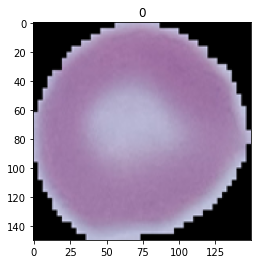

In [19]:
import random 
import numpy as np 
image_number =random.randint(0,len(dataset)-1) 
plt.imshow(np.reshape(dataset[image_number],(150,150,3))) 
plt.title(str(label[image_number]))
print(" Label de cette image : ", label[image_number]) 


### Exercice 2 : Construction et entrainement du modèle 


#### Préparez le jeu de données d’entrainement et de test comme suit : 


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size =0.20, random_state =0) 


#### Normalisez les données comme suit : 

X_train = X_train/255. 
X_test = X_test/255.

In [22]:
X_train=X_train/255
X_test = X_test/255

Autre possibilité avec keras : 

In [23]:
"""
from keras.utils import normalize
X_train = normalize(X_train,axis=1)
X_test = normalize(X_test,axis=1)
"""

'\nfrom keras.utils import normalize\nX_train = normalize(X_train,axis=1)\nX_test = normalize(X_test,axis=1)\n'

#### Commentez chacune des lignes de code : 


In [24]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Flatten, Dense, Dropout

In [27]:
INPUT_SHAPE =(SIZE, SIZE, 3) 
model = keras.Sequential()
model.add(Conv2D(32,(3,3),input_shape = INPUT_SHAPE,activation='relu')) 
#model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(32,(3,3), kernel_initializer = 'he_uniform',activation='relu')) 
#model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(64,(3,3), kernel_initializer = 'he_uniform',activation='relu')) 
#model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten()) 
model.add(Dense(64,activation='relu')) 
#model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1,activation='sigmoid')) 
#model.add(Activation('sigmoid')) 

#### Compilez le modèle : 

In [28]:
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy']) 

puis affichez les caractéristiques de l’architecture en vous aidant de : 

In [29]:
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [30]:
y_train.shape

(22046,)

In [31]:
np.unique(y_train)

array([0, 1])

#### Entrainez le modèle : 


In [32]:
History = model.fit(X_train, y_train, batch_size=64, verbose = 1, epochs =3, validation_data =(X_test, y_test), shuffle = False) 

Epoch 1/3
345/345 [==============================] - 345s 989ms/step - loss: 0.5476 - accuracy: 0.7302 - val_loss: 0.2592 - val_accuracy: 0.9129
Epoch 2/3
345/345 [==============================] - 340s 985ms/step - loss: 0.2381 - accuracy: 0.9263 - val_loss: 0.1966 - val_accuracy: 0.9410
Epoch 3/3
345/345 [==============================] - 339s 982ms/step - loss: 0.1838 - accuracy: 0.9453 - val_loss: 0.1990 - val_accuracy: 0.9334


### Exercice 3 : Analyse des performances du modèle


#### performances  
Affichez les performances obtenus sur les données d’entrainenent et de validation en fonction du 
nombre d’épisodes (en changeant la valeur de epochs = 20 puis epochs = 30) : 

In [34]:
loss = History.history['loss']

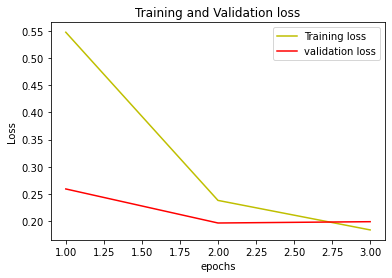

In [38]:

loss = History.history['loss']
val_loss = History.history['val_loss']
epochs = range(1,len(loss)+1) 
plt.plot(epochs,loss,'y', label ='Training loss')

plt.plot(epochs,val_loss,'r', label ='validation loss') 
plt.title ('Training and Validation loss') 
plt.xlabel('epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show() 

Commentez les courbes affichées. 

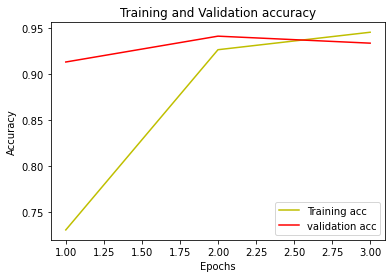

In [39]:
acc = History.history['accuracy'] 
val_accu = History.history['val_accuracy'] 
plt.plot(epochs,acc,'y', label ='Training acc') 
plt.plot(epochs,val_accu,'r', label ='validation acc') 
plt.title ('Training and Validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show() 

Commentez les courbes affichées.

#### Testez les performances du modèle entrainé : 


Label de cette image :  0
Prédiction de cette image : [[0.98965925]]
Le label de cette image est :  [[0.98965925]]


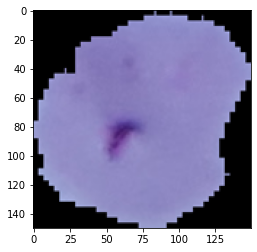

In [40]:
n =random.randint(0,len(X_test)-1) 
img = X_test[n] 
plt.imshow(img) 
input_img = np.expand_dims(img,axis=0) 
print("Label de cette image : ", label[image_number]) 
print('Prédiction de cette image :', model.predict(input_img)) 
print('Le label de cette image est : ', model.predict(input_img)) 

Nous avons bien un bien resultat malgré que le modèle à été entrainner sur un nombre sur 3 epoch

#### Evaluez la performance du modèle sur toutes les images de tests : 


In [47]:

acc = model.evaluate(X_test, y_test) 


173/173 [==============================] - 21s 120ms/step - loss: 0.1990 - accuracy: 0.9334


In [48]:
print(acc)

[0.1989867389202118, 0.9334179759025574]


### Exercice 4 : Analyse de la matrice de confusion 

Il s’agit de comparer les labels prédits aux vrais labels. 


#### La sigmoid génère à sa sortie des probabilités, il est donc nécessaire de convertir ces valeurs en 0 et 1 par seuillage : 


In [49]:
threshold = 0.5 
from sklearn.metrics import confusion_matrix 
import seaborn as sns 
y_pred = (model.predict(X_test)>=threshold).astype(int) 

#### Calculez la matrice de confusion : 


<AxesSubplot:>

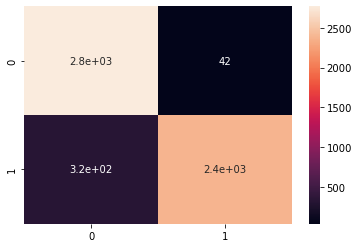

In [50]:
cm = confusion_matrix(y_test,y_pred) 
sns.heatmap(cm,annot=True) 

In [53]:
cm

array([[2767,   42],
       [ 325, 2378]], dtype=int64)

sur 3 epoch d'entrainement nous avons pu atteindre 2767 bonne prediction pour la classe `Uninfected`  
et 2378 de bonne prediction pour la classe `Parasitized`.

In [59]:
print("Nombre d'erreur de classification : ",cm.sum()-np.trace(cm))

Nombre d'erreur de classification :  367


In [64]:
print(f"Taux de reussite à 3 epoch : {100- ((cm.sum()-np.trace(cm)) / (cm.sum()))*100} %")

Taux de reussite à 3 epoch : 93.1422351233672 %


un très bon résultat



#### Modifiez la valeur du seuil puis calculez la nouvelle matrice de confusion. Qu’en est-il de la nouvelle matrice de confusion ?

<AxesSubplot:>

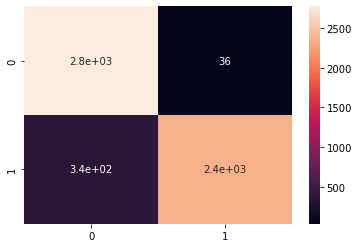

In [62]:
threshold = 0.6
y_pred = (model.predict(X_test)>=threshold).astype(int) 

cm = confusion_matrix(y_test,y_pred) 
sns.heatmap(cm,annot=True) 

In [65]:
print("Nombre d'erreur de classification : ",cm.sum()-np.trace(cm))

Nombre d'erreur de classification :  378


un moins bon resultat par rapport au 5

Nombre d'erreur de classification :  312


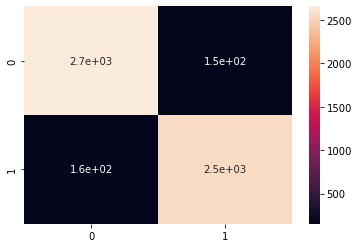

In [67]:
threshold = 0.1
y_pred = (model.predict(X_test)>=threshold).astype(int) 

cm = confusion_matrix(y_test,y_pred) 
sns.heatmap(cm,annot=True)
print("Nombre d'erreur de classification : ",cm.sum()-np.trace(cm))

Cette fois nous avons vraiment une amelioration par rapport au threshold=5

#### La courbe ROC peut aider à trouver la valeur du seuil. 


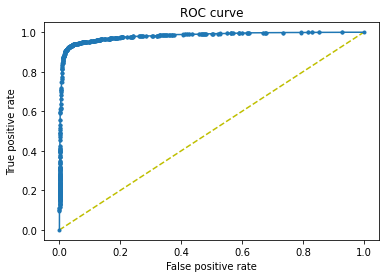

In [52]:
from sklearn.metrics import roc_curve 
y_preds = model.predict(X_test).ravel() 
fpr, tpr, thresold = roc_curve(y_test, y_preds) 
plt.figure(1) 
plt.plot([0,1],[0,1],'y--') 
plt.plot(fpr,tpr,marker='.') 
plt.xlabel('False positive rate') 
plt.ylabel('True positive rate') 
plt.title('ROC curve') 
plt.show()

Le temps de calcul pour l'apprentissage prend des heures et des ressources de calcul importante  
sans cette limite, je pouvais l'apprentissage sur 10, 15, 20, 30 epoch, mais à 3 epoch nous avons deja un debut de bon resultat

Fin !